<a href="https://colab.research.google.com/github/garg1709/Hamoye-Data-Science-Internship/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")

In [ ]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.shape

(92016, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [ ]:
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df1.drop(["Tmax","SysLoad","GasPrice"], axis=1, inplace=True)

In [ ]:
df1.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [ ]:
df1["FullDate"] = pd.to_datetime(df1["FullDate"])

In [ ]:
df1.set_index("FullDate", inplace=True)

In [ ]:
df1.head()

,ElecPrice
FullDate,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [ ]:
df1 = df1.resample('D').sum()

In [ ]:
df1.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


In [ ]:
df1.reset_index(inplace=True)

In [ ]:
df1.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [ ]:
df1 = df1.rename(columns={"FullDate":"ds", "ElecPrice":"y"})

In [ ]:
df1.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


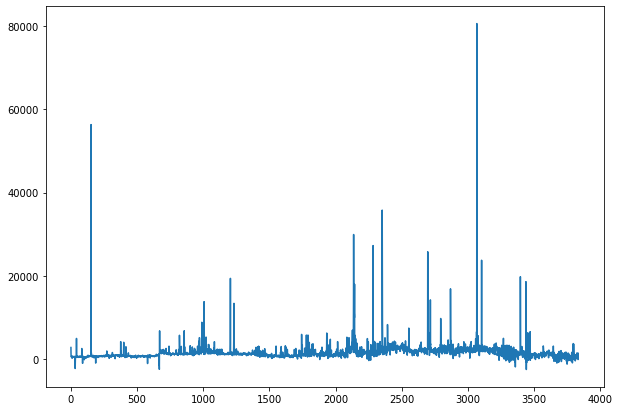

In [ ]:
# Q.11

plt.figure(figsize=(10,7))
plt.plot(df1['y'])

In [ ]:
df1.shape

(3834, 2)

In [ ]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [ ]:
df.set_index("FullDate", inplace=True)

In [ ]:
df = df.resample('D').sum()

In [ ]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
# Q.12

from statsmodels.tsa.stattools import adfuller
X = df['SysLoad'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.690159
p-value: 0.004254
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# Q.12

from statsmodels.tsa.stattools import adfuller
X = df['GasPrice'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.902767
p-value: 0.045027
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
# Q.13

from statsmodels.tsa.stattools import adfuller
X = df['ElecPrice'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.269054
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
train = df1[:2757]
test = df1[2757:]

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 3.5 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639016 sha256=44523585b49e51c2c299c22c74edc9edb6525e7751f9371a7228d470e0e8cd99
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
from fbprophet import Prophet 
model = Prophet()
model.fit(train) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods= 1077 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1439.709973,3332.931359,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1193.151465,3245.935378,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1661.630535,3164.964735,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1837.310328,2896.992125,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-1999.295781,2726.619717,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
3829,2021-02-24,3475.863766,424.379409,6426.483859,3567.126543,1816.850537,5311.874957
3830,2021-02-25,3542.743730,458.357412,6488.721993,3567.943112,1811.303577,5315.238405
3831,2021-02-26,3309.660718,299.172175,6270.583892,3568.759681,1807.433932,5318.601853
3832,2021-02-27,2966.465610,-15.818389,5932.475478,3569.576250,1805.660467,5321.965301


In [ ]:
forecast['yhat'][3000:]

3000    2219.434330
3001    2729.225106
3002    2632.456629
3003    2814.293617
3004    2944.906062
           ...     
3829    3475.863766
3830    3542.743730
3831    3309.660718
3832    2966.465610
3833    2878.477834
Name: yhat, Length: 834, dtype: float64

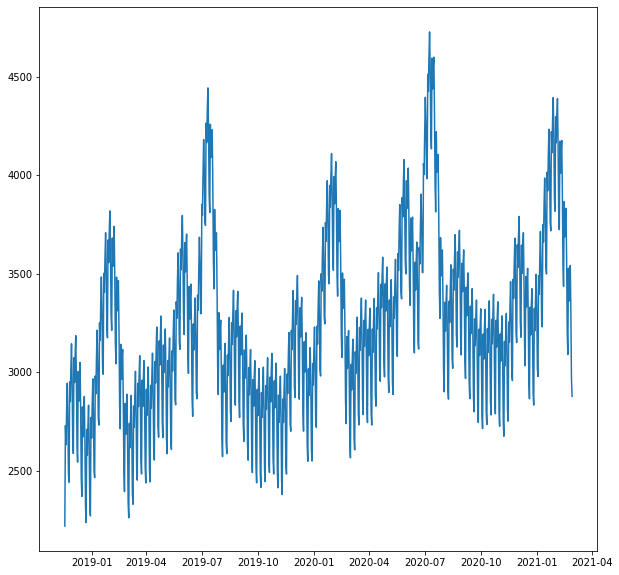

In [ ]:
# Q.16
plt.figure(figsize=(10,10))
plt.plot(forecast['ds'][3000:],forecast['yhat'][3000:])
plt.show()

In [ ]:
# Q.14

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['y'],forecast['yhat'][2757:]) * 100

549.4751413716547

In [ ]:
# Q.15

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['y'],forecast['yhat'][2757:]))

3218.15577651241

In [ ]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [ ]:
df.set_index("FullDate", inplace=True)

In [ ]:
df = df.resample('D').sum()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,FullDate,index,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,0,379.2,41565.380,88.56,2751.700
1,2010-09-02,1,369.6,38898.990,88.56,570.810
2,2010-09-03,2,439.2,41665.760,106.80,504.975
3,2010-09-04,3,328.8,35638.085,81.36,502.275
4,2010-09-05,4,357.6,35611.410,106.80,500.555


In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.rename(columns={'FullDate':'ds', 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3', 'ElecPrice':'y'}, inplace=True)

In [ ]:
df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
train = df[:2757]
test = df[2757:]

In [ ]:
test

,ds,add2,add1,add3,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.000
2758,2018-03-21,571.2,4658.05865,203.2560,1730.490
2759,2018-03-22,722.4,19161.78525,203.2560,2260.550
2760,2018-03-23,811.2,18090.43435,198.6456,2138.760
2761,2018-03-24,832.8,3763.53865,180.2160,1721.700
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [ ]:
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.add_regressor('add3')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#future = m.make_future_dataframe(periods= 1077 , freq= 'D')
#future['add1'] = test['add1']
#future['add2'] = test['add2']
#future['add3'] = test['add3']

forecast1 = m.predict(test.drop(columns = 'y'))
forecast1.head()
forecast1[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1985.365644,-239.572353,4132.352560,1866.664112,1866.664112,1866.664112
1,2018-03-21,1976.703318,-277.766816,4206.426245,1867.349885,1867.349885,1867.349885
2,2018-03-22,2897.096666,752.406385,5170.383550,1868.035658,1868.035658,1868.035658
3,2018-03-23,2581.305545,398.781732,4899.890715,1868.721432,1868.721432,1868.721432
4,2018-03-24,1434.385996,-600.918083,3668.494922,1869.407205,1869.407205,1869.407205
...,...,...,...,...,...,...,...
1072,2021-02-24,953.579564,-1342.710838,3333.453637,2601.813038,1847.321092,3321.907635
1073,2021-02-25,1313.293701,-937.147947,3678.521601,2602.498811,1846.715340,3323.832433
1074,2021-02-26,1377.207811,-947.176394,3735.162915,2603.184585,1846.109588,3325.757231
1075,2021-02-27,1032.064004,-1229.582610,3401.869965,2603.870358,1845.503837,3327.682030


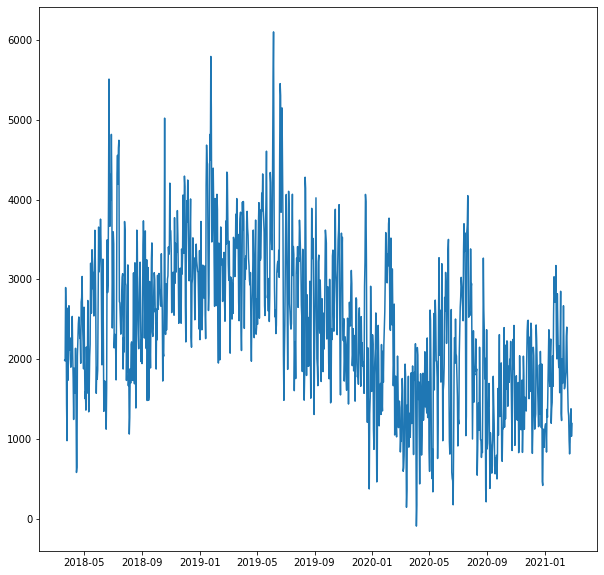

In [ ]:
# Q.19

plt.figure(figsize=(10,10))
plt.plot(forecast1['ds'],forecast1['yhat'])
plt.show()

In [ ]:
# Q.17
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['y'], forecast1['yhat']) * 100

231.28067149407525

In [ ]:
# Q.18
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['y'], forecast1['yhat']))

2706.9157225037015

In [ ]:
df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [ ]:
df.drop('add2', axis=1, inplace=True)

In [ ]:
train = df[:2757]
test = df[2757:]

In [ ]:
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add3')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast2 = m.predict(test.drop(columns = 'y'))
forecast2.head()
forecast2[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1990.109647,-261.512320,4283.505438,1871.211040,1871.211040,1871.211040
1,2018-03-21,1981.488181,-158.322713,4247.021130,1871.907673,1871.907673,1871.907673
2,2018-03-22,2901.407643,575.215315,5064.580242,1872.604305,1872.604305,1872.604305
3,2018-03-23,2586.203182,280.107974,4643.972760,1873.300938,1873.300938,1873.300938
4,2018-03-24,1438.676772,-742.615729,3682.091136,1873.997570,1873.997570,1873.997570
...,...,...,...,...,...,...,...
1072,2021-02-24,968.851787,-1508.710219,3244.856866,2618.001005,1856.694818,3395.676703
1073,2021-02-25,1328.118956,-1136.335497,3701.284223,2618.697637,1856.318854,3397.551857
1074,2021-02-26,1392.695630,-938.599476,3703.322291,2619.394269,1856.542594,3399.427011
1075,2021-02-27,1047.062976,-1504.204128,3462.938467,2620.090902,1856.766333,3401.302166


In [ ]:
# Q.20
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test['y'], forecast2['yhat']) * 100

233.7211726531121